## Introdcution Pytorch CNN

In [63]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

%matplotlib inline

In [64]:
torch.manual_seed(1)    # reproducible

## Gérer les données avec Dataset et Dataloader

Les classes Dataset et Dataloader permettent de faciliter la gestion des données sous PyTorch. La classe Dataset est une classe abstraite qui permet de préciser comment un exemple est chargé, pré-traité, transformé etc et donne accès par l’intermédiaire d’un itérateur à chaque exemple d’un jeu de données. 

La classe Dataloader encapsule un jeu de données et permet de requêter de diverses manières ce jeu de données : spécifier la taille du mini-batch, si l’ordre doit être aléatoire ou non, de quelle manière sont concaténés les
exemples, etc.

Pour implémenter un Dataset, il suffit de définir deux méthodes __getitem__(self,index) et __len__(self) :

from torch.utils.data import Dataset , DataLoader

c l a s s MonDataset (Dataset) :

    d e f __init__ ( s e l f ,... ) :
        
        
    d e f __getitem__ (self , index ) :
    """ retourne un couple (exemple , label) correspondant a l’index """
    pa s s
    
    d e f __len__( s e l f ) : 
    """renvoie la taille du jeu de donnees """
    pass
    
Une fois un dataset MonDataset implémenté, il suffit de créer un DataLoader de la manière suivante par exemple :

"Creation du dataloader, en specifiant la taille du batch et ordre aleatoire"
data = DataLoader ( MonDataset ( . . . ) , shuffle=True , batch_size=BATCH_SIZE)
for x , y in data :





In [70]:
from sklearn import datasets

X,y = datasets.load_diabetes( return_X_y=True)

num_epochs = 150
batch_size = 32

class DataSet:

    def __init__(self, X,y):
        """La fonction init ne doit pas faire de gros travaux, 
        mais doit initialiser le nombre d'éléments disponibles dans cet ensemble de données.
        """

        self.X = X
        self.y = y

    def __len__(self):
        """renvoie le nombre de points dans notre ensemble de données"""

        return len(self.X)

    def __getitem__(self, idx):
        """ Ici, nous devons renvoyer l'élément demandé par `idx` 
        La classe PyTorch DataLoader utilisera cette méthode pour 
        créer un itérable pour notre boucle d'entraînement ou de validation.
        """

        X_idx = X[idx]
        y_idx = y[idx]

        return X_idx, y_idx     
    
ds = DataSet(X,y)
dataloader = DataLoader(ds, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    print('num epochs',epoch)
    for data, label in dataloader:
        print("size data",len(data))


num epochs 0
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 1
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 2
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 3
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 4
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 5
size data 32

size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 83
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 84
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 85
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 86
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 26
num epochs 87
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size data 32
size da

In [35]:
# Hyper Parameters
EPOCH = 1               
# train the input data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
# 50 samples at a time to pass through the epoch
LR = 0.001              
# learning rate
DOWNLOAD_MNIST = True   
# set to False if you have downloaded

In [36]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     
    # this is training data
    transform=torchvision.transforms.ToTensor(),    
    # torch.FloatTensor of shape (Color x Height x Width) and 
    #normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        
    # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


C:\Users\mehdihennequin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\mehdihennequin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


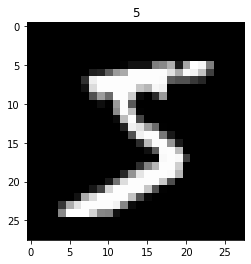

In [37]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [38]:
# Data Loader for easy mini-batch return in training, the image batch shape will be 
#(50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [39]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

C:\Users\mehdihennequin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\mehdihennequin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  
                # if want same width and length of this image after con2d, 
                #padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    
            # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [41]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [42]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [47]:
from matplotlib import cm
try:
    from sklearn.manifold import TSNE; HAS_SK = False
except:
    HAS_SK = False
    print('Please install sklearn for layer visualization, if not there')
    
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer');
    plt.show(); 
    #plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), 
                  '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

tensor([[-11.1934,  -5.2382,  -2.3395,  ...,  15.7630,  -7.5593,  -1.3625],
        [ -2.1981,  -0.2660,  11.8900,  ...,  -9.9730,  -1.8357, -11.4239],
        [ -7.7051,   7.1453,  -4.7893,  ...,   0.0868,  -1.0604,  -6.3846],
        ...,
        [-12.7358,  -4.1211,  -4.7126,  ...,  -5.9781,  -1.3173,  -1.1922],
        [ -9.6763, -13.7208,  -8.0760,  ...,  -3.4718,  -3.4743,   8.9725],
        [-16.8286, -16.3634,  -9.7840,  ...,  -2.2014,  -2.9999,   2.1972]],
       grad_fn=<AddmmBackward>)
Epoch:  0 | train loss: 0.0221 | test accuracy: 0.99
tensor([[ -9.5168,  -5.9846,  -3.3235,  ...,  13.4248,  -7.0872,  -1.4354],
        [ -1.7988,  -1.2244,  11.8701,  ..., -12.9482,  -1.4020, -12.8091],
        [ -7.9381,   7.8109,  -5.6250,  ...,  -0.8119,  -1.8304,  -6.4004],
        ...,
        [-12.0910,  -5.2735,  -5.5444,  ...,  -7.7741,  -0.6420,  -1.6943],
        [ -9.3051, -14.1242,  -9.6837,  ...,  -6.2058,  -3.8453,   8.9961],
        [-15.7568, -17.7155, -10.4950,  ...,  -3.229

In [55]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

torch.return_types.max(
values=tensor([12.9311, 13.4030,  7.4694, 10.4757,  9.4529,  9.8677,  5.7826,  6.5737,
         7.9176,  7.0835], grad_fn=<MaxBackward0>),
indices=tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))
[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [14]:
#Save and Reload

In [15]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [16]:
#sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [17]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [18]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [19]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

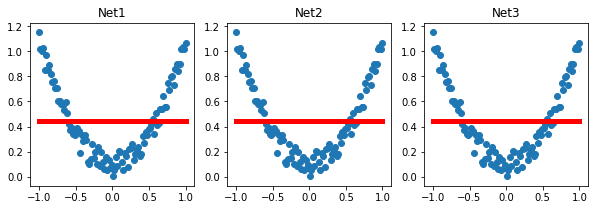

In [20]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()